In [1]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
from joblib import load
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [2]:
x = pd.read_csv('/Users/pavelbozmarov/Desktop/trubrics/intern-technical-test-main/X.csv')
y = pd.read_csv('/Users/pavelbozmarov/Desktop/trubrics/intern-technical-test-main/y.csv')

In [3]:
df_main = pd.concat([x, y], axis=1)
df_main.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Descriptive analysis

In [4]:
SPECIES_DICT = {0: 'Iris Setosa', 1: 'Iris Versicolor', 2: 'Iris Virginica'}

In [5]:
df = df_main.copy()

In [6]:
# Add the species labels
df['species_labels'] = df['species'].map(SPECIES_DICT)

In [7]:
df['species'], df['species_labels'] = df['species_labels'], df['species']

In [8]:
df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_labels
0,5.1,3.5,1.4,0.2,Iris Setosa,0
1,4.9,3.0,1.4,0.2,Iris Setosa,0
2,4.7,3.2,1.3,0.2,Iris Setosa,0
3,4.6,3.1,1.5,0.2,Iris Setosa,0
4,5.0,3.6,1.4,0.2,Iris Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris Virginica,2
146,6.3,2.5,5.0,1.9,Iris Virginica,2
147,6.5,3.0,5.2,2.0,Iris Virginica,2
148,6.2,3.4,5.4,2.3,Iris Virginica,2


In [9]:
# save as csv
df.to_csv('/Users/pavelbozmarov/Desktop/trubrics/intern-technical-test-main/df_all.csv',index=False)

In [10]:
# Group the data by 'species' and calculate mean and standard deviation
stats_df = df.groupby('species')['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].agg(['mean', 'std'])

# Reset the index to make 'species' a column
stats_df.reset_index(inplace=True)

# Display the table
stats_df 

# save as a csv file
stats_df.to_csv('/Users/pavelbozmarov/Desktop/trubrics/intern-technical-test-main/stats.csv')

/var/folders/yf/fd8yb9d12hsccs2knsm13gw00000gn/T/ipykernel_44966/1383367888.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stats_df = df.groupby('species')['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].agg(['mean', 'std'])


In [11]:
header_style = {
    'selector': 'th',
    'props': [('background-color', 'lightblue')]
}

# Apply the heading style to the DataFrame
styled_df = stats_df.style.set_table_styles([header_style])
styled_df


In [12]:
df.value_counts("species")

species
Iris Setosa        50
Iris Versicolor    50
Iris Virginica     50
dtype: int64

In [13]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'species_labels'],
      dtype='object')

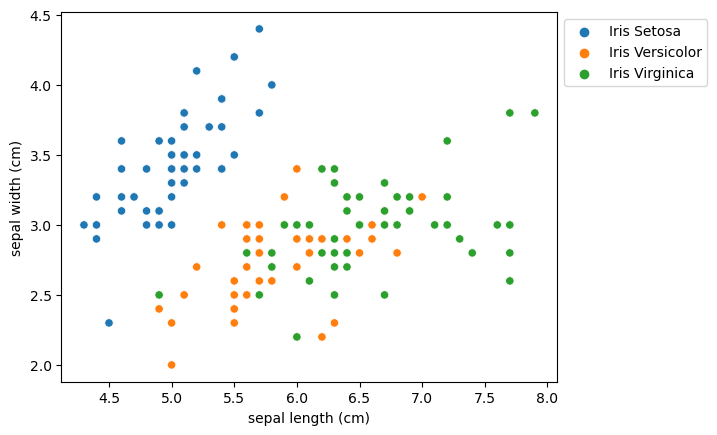

In [14]:
# Scatterplot sepal length vs sepal width colored by species
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

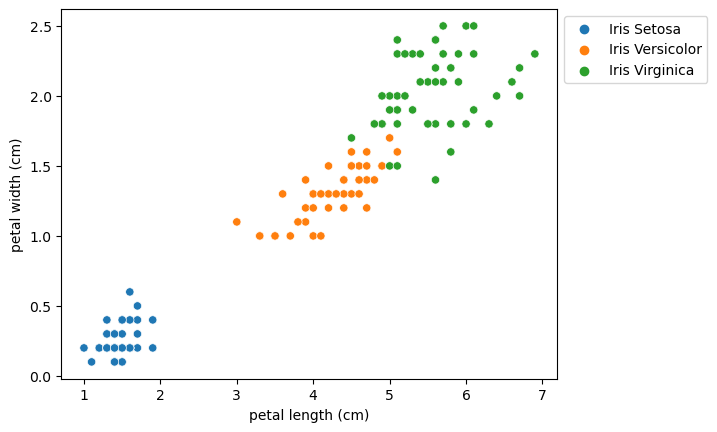

In [15]:
# Scatterplot sepal length vs sepal width colored by species
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

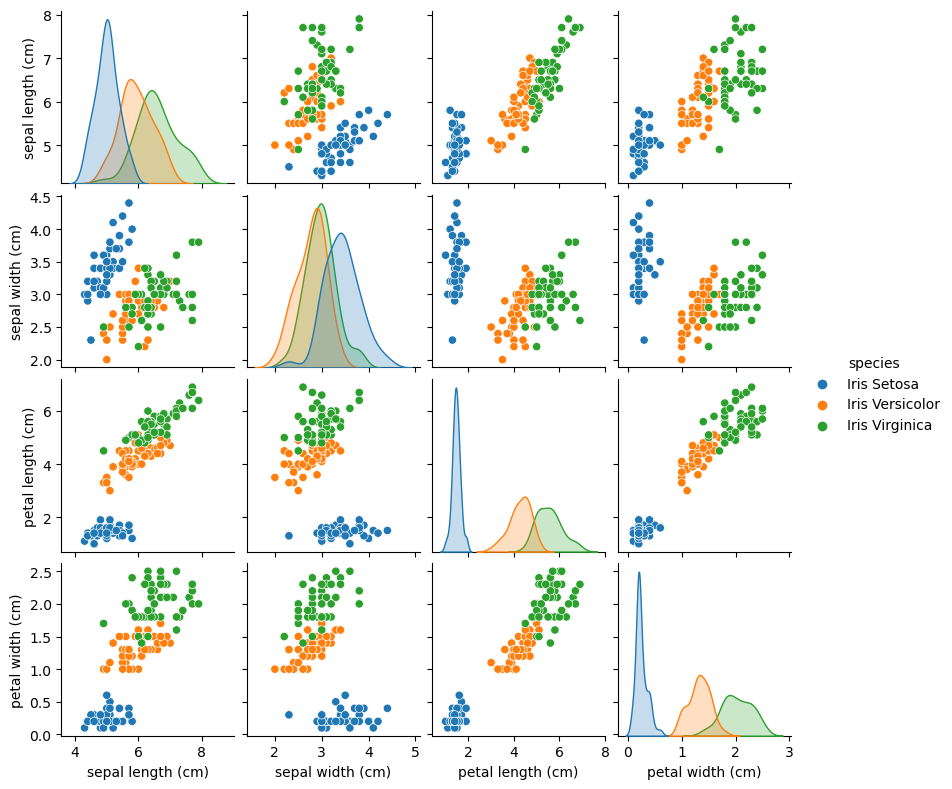

In [16]:
# More descriptive pairplot
sns.pairplot(df.drop(columns=['species_labels'],axis=1),
             hue='species', height=2)

             

/var/folders/yf/fd8yb9d12hsccs2knsm13gw00000gn/T/ipykernel_44966/1288078692.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson').drop(


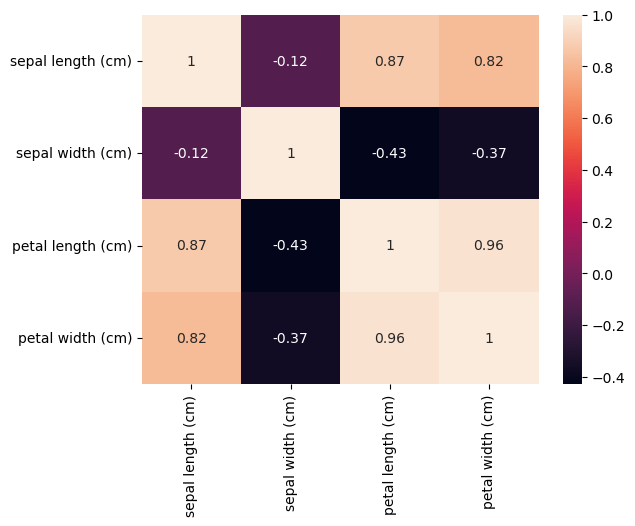

In [17]:
# Correlations between features
sns.heatmap(df.corr(method='pearson').drop(
  ['species_labels'], axis=1).drop(['species_labels'], axis=0),
            annot = True);
 
plt.show()

# Training the model

In [4]:
df = df_main.copy()
model = LogisticRegression()

# Shuffle the DataFrame
df = shuffle(df)

# Define features and target variable
features = df.drop(columns='species') # replace 'species' with the name of your target column

features = df.iloc[:, :4]  # Select first 4 columns
target = df['species'] # replace 'species' with the name of your target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

/opt/anaconda3/envs/papi/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


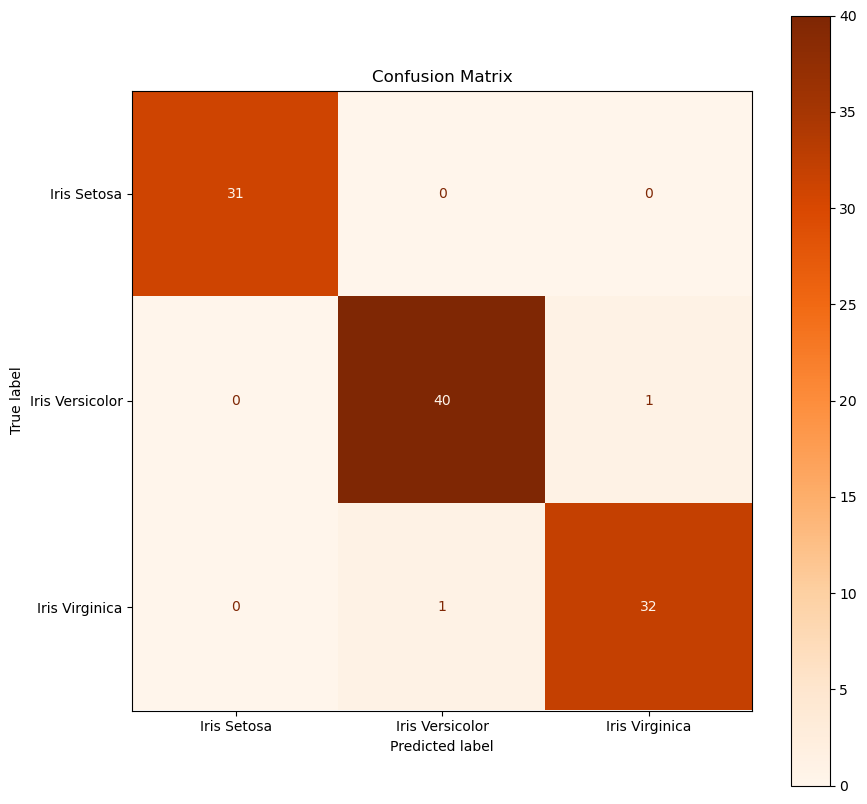

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix

# species dictionary
SPECIES_DICT = {0: 'Iris Setosa', 1: 'Iris Versicolor', 2: 'Iris Virginica'}

# Make predictions on the test data
y_pred = model.predict(X_train)
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))  # adjust the size of the plot according to your needs

# plotting the confusion matrix
plot_confusion_matrix(model, X_train, y_train, display_labels=SPECIES_DICT.values(), ax=ax, cmap='Oranges')

plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_train, y_pred, output_dict=True)

# Calculate class-wise accuracy from confusion matrix
cm = confusion_matrix(y_train, y_pred)
class_accuracy = cm.diagonal()/cm.sum(axis=1)

# Create a DataFrame for the metrics
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

# These are your classes with species names
classes = [f"{c} ({SPECIES_DICT[c]})" for c in SPECIES_DICT.keys()]

data = {}

for metric in metrics:
    if metric == 'accuracy':
        # Use the separately calculated accuracy per class
        data[metric] = class_accuracy
    else:
        # For other metrics, use the values from the report
        data[metric] = [report[str(c)][metric] for c in SPECIES_DICT.keys()]

# Create DataFrame
df = pd.DataFrame(data, index=classes).transpose().round(2)

df.to_csv('/Users/pavelbozmarov/Desktop/trubrics/intern-technical-test-main/train_metrics.csv',index=False)

# Testing the model

/opt/anaconda3/envs/papi/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


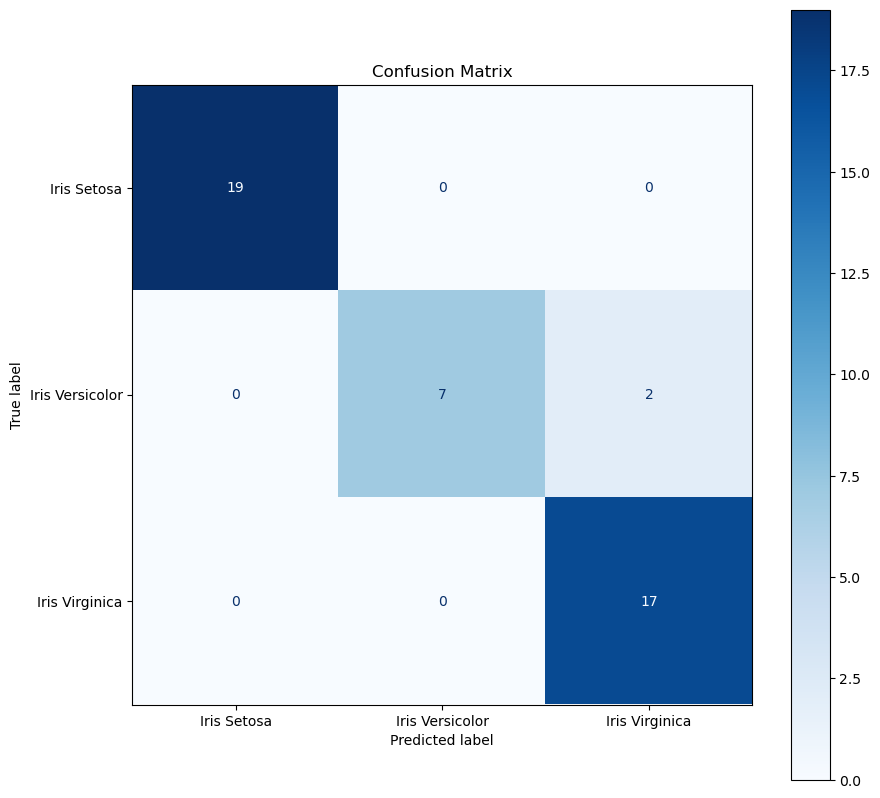

,0 (Iris Setosa),1 (Iris Versicolor),2 (Iris Virginica)
accuracy,1.0,0.78,1.00
precision,1.0,1.00,0.89
recall,1.0,0.78,1.00
f1-score,1.0,0.88,0.94


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix

# species dictionary
SPECIES_DICT = {0: 'Iris Setosa', 1: 'Iris Versicolor', 2: 'Iris Virginica'}

# Make predictions on the test data
y_pred = model.predict(X_test)
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))  # adjust the size of the plot according to your needs

# You can also use the display_labels parameter to display your actual class labels in the confusion matrix
plot_confusion_matrix(model, X_test, y_test, display_labels=SPECIES_DICT.values(), ax=ax, cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Calculate class-wise accuracy from confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_accuracy = cm.diagonal()/cm.sum(axis=1)

# Create a DataFrame for the metrics
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

# These are your classes with species names
classes = [f"{c} ({SPECIES_DICT[c]})" for c in SPECIES_DICT.keys()]

data = {}

for metric in metrics:
    if metric == 'accuracy':
        # Use the separately calculated accuracy per class
        data[metric] = class_accuracy
    else:
        # For other metrics, use the values from the report
        data[metric] = [report[str(c)][metric] for c in SPECIES_DICT.keys()]

# Create DataFrame
df = pd.DataFrame(data, index=classes).transpose().round(2)

df


# Finding missclassified samples

In [21]:
df_test = pd.read_csv('/Users/pavelbozmarov/Desktop/trubrics/df_test.csv')

In [23]:
X_test = df_test.drop(columns='species') 
y_test = df_test['species'] 

In [21]:
# Make predictions
X_test = X_test.reset_index(drop=True)
y_pred = model.predict(X_test)
# reset the index of y_test
y_test = y_test.reset_index(drop=True)
# Find the indices where the predicted and true labels disagree
misclassified_indices = y_test[y_test != y_pred].index

# Create a dataframe of misclassified samples
df_misclassified = X_test.loc[misclassified_indices]

# Add true and predicted labels to the dataframe
df_misclassified['true_label'] = y_test.loc[misclassified_indices]
df_misclassified['predicted_label'] = y_pred[misclassified_indices]

# Reset the index
df_misclassified.reset_index(drop=True, inplace=True)

# Print the misclassified dataframe
df_test_misclassified = df_misclassified.copy()
df_test_misclassified
df_test_misclassified.to_csv('test_misclassified .csv', index=False)


In [22]:
df_test_misclassified

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),true_label,predicted_label
0,6.7,3.0,5.0,1.7,1,2
1,6.0,2.7,5.1,1.6,1,2


In [23]:
y_pred = model.predict(X_train)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
# Find the indices where the predicted and true labels disagree
misclassified_indices = y_train[y_train != y_pred].index

# Create a dataframe of misclassified samples
df_misclassified = X_train.loc[misclassified_indices]

# Add true and predicted labels to the dataframe
df_misclassified['true_label'] = y_train.loc[misclassified_indices]
df_misclassified['predicted_label'] = y_pred[misclassified_indices]

# Reset the index
df_misclassified.reset_index(drop=True, inplace=True)

# Print the misclassified dataframe
df_train_misclassified = df_misclassified.copy()
df_train_misclassified
df_train_misclassified.to_csv('train_misclassified.csv', index=False)

In [24]:
df_train_misclassified

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),true_label,predicted_label
0,4.9,2.5,4.5,1.7,2,1
1,5.9,3.2,4.8,1.8,1,2
